                        MACHINE LEARNING CAPSTONE PROJECT - TO PREDICT GENDER USING DENTISTRY METRICES

In [18]:
# Importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from xgboost import XGBClassifier

In [20]:
#Import dataset using pandas

df = pd.read_csv("Dentistry Dataset.csv")

In [22]:
# Data Preprocessing
# i) Identify and handle missing values

df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)


In [24]:
#Display dataframe

display(df)

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,NaN,24,Male,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272
1096,1097,NaN,22,Male,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269
1097,1098,NaN,25,Male,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272
1098,1099,NaN,21,Male,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267


In [26]:
#Removing unnecessary columns in the dataset

df.drop(columns=['Sl No', 'Sample ID'], inplace=True)

In [28]:
#Display of dataframe after removing unnecessary columns

display(df)

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,24,Male,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272
1096,22,Male,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269
1097,25,Male,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272
1098,21,Male,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267


In [30]:
# ii) Encoding categorical data

le = LabelEncoder()       # used to encode the categorical values in the 'Gender' column of a Pandas DataFrame (df) into numerical values using the LabelEncoder class from the sklearn library
df['Gender'] = le.fit_transform(df['Gender'])    

In [32]:
# iii) Split independent and dependent variables

X = df.drop(['Gender'], axis=1)     # X input variable
Y = df['Gender']                    # Y output variable

In [34]:
# iv) Normalize the X variable

normalizer = Normalizer()             # Normalizer is to scale the values in the feature matrix X to a common range, typically between 0 and 1
X = normalizer.fit_transform(X)         

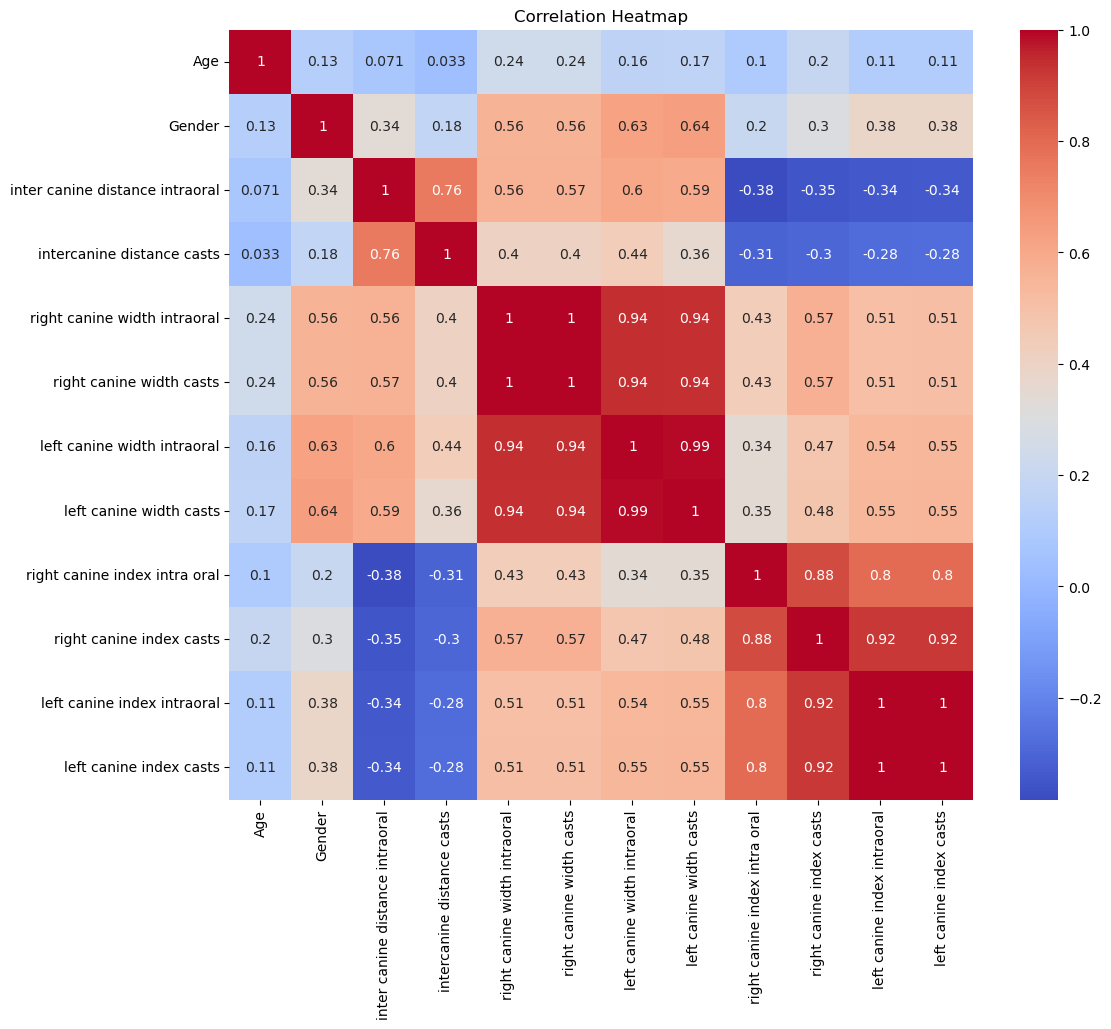

In [36]:
# Step 5: Exploratory Data Analysis

# i) Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [38]:
# Model Building

# i) Drop the unwanted independent variables (if any)
# Let's assume all variables are needed for now.

# ii) Drop the independent features which are highly correlated to each other
# For simplicity, we'll keep all features for model building in this example

# iii) Split the Data into Train and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [40]:
# iv) Use Logistic Regression, Decision Tree classifier, Random Forest classifier and XGBoost classifier

models = {
    'Logistic Regression': LogisticRegression(),    # Implements logistic regression algorithm.
    'Decision Tree': DecisionTreeClassifier(),      # Builds decision tree classifier model.
    'Random Forest': RandomForestClassifier(),      # Creates random forest ensemble model
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')   # Implements extreme gradient boosting.
}

In [42]:

for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f'{name} Accuracy: {accuracy:.2f}')

Logistic Regression Accuracy: 0.65
Decision Tree Accuracy: 0.85
Random Forest Accuracy: 0.88


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:27:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.88


Logistic Regression Model:
Accuracy: 0.6515
Confusion Matrix:
[[ 77  92]
 [ 23 138]]


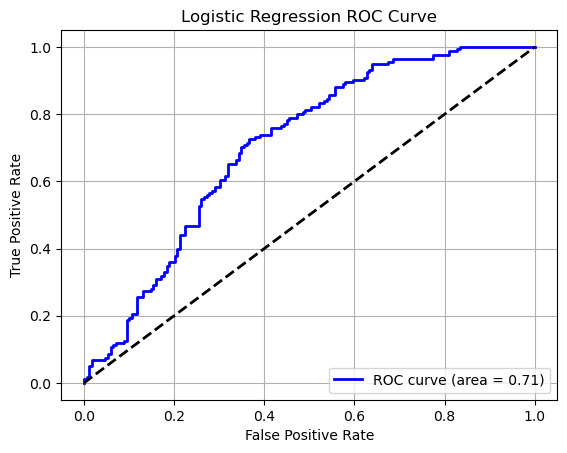

Decision Tree Model:
Accuracy: 0.8455
Confusion Matrix:
[[134  35]
 [ 16 145]]


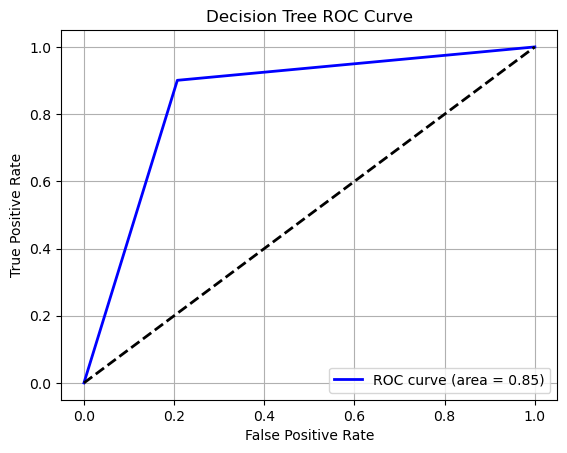

Random Forest Model:
Accuracy: 0.8758
Confusion Matrix:
[[149  20]
 [ 21 140]]


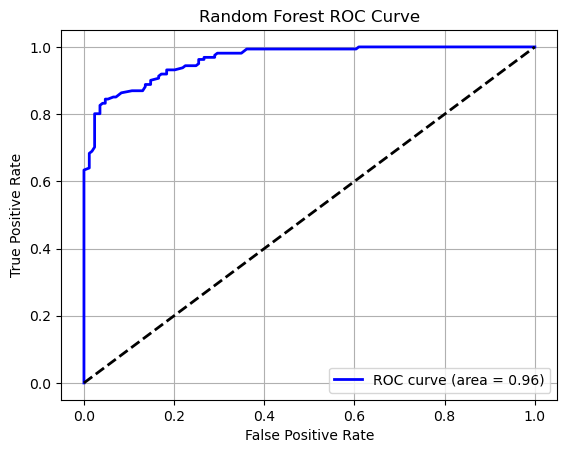

C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:30:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model:
Accuracy: 0.8818
Confusion Matrix:
[[151  18]
 [ 21 140]]


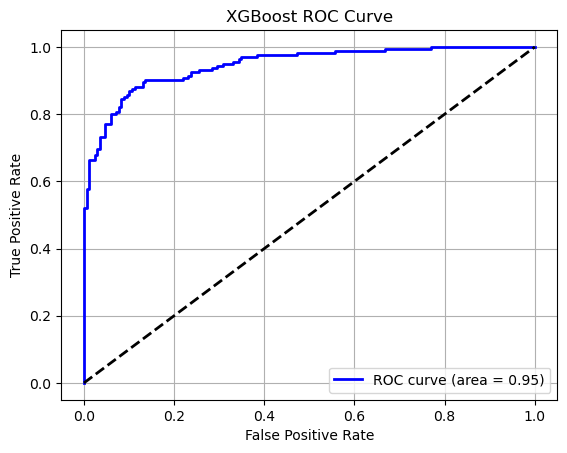

In [46]:
# Evaluation

# i) Evaluate the model based on the model's evaluation metrics

evaluation_summary = []
from sklearn.metrics import auc, confusion_matrix, roc_curve
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    cm = confusion_matrix(Y_test, Y_pred)
    print(f'{model_name} Model:')
    print(f'Accuracy: {accuracy:.4f}')
    print('Confusion Matrix:')
    print(cm)
    Y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)
    roc_auc = auc(fpr, tpr)
    evaluation_summary.append([model_name, accuracy, roc_auc])

# Plot ROC curve    
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})', color='b', lw=2)
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

In [50]:
# Summary of Evaluation

summary_df = pd.DataFrame(evaluation_summary, columns=["Model", "Accuracy", "AUC"])

In [52]:
# Display the summary dataframe 

print("\nSummary of Model Accuracies:")
display(summary_df)



Summary of Model Accuracies:


,Model,Accuracy,AUC
0,Logistic Regression,0.651515,0.707854
1,Decision Tree,0.845455,0.846760
2,Random Forest,0.875758,0.962604
3,XGBoost,0.881818,0.946305


C:\Users\Admin\AppData\Local\Temp\ipykernel_4820\2020594502.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=summary_df, palette='viridis')


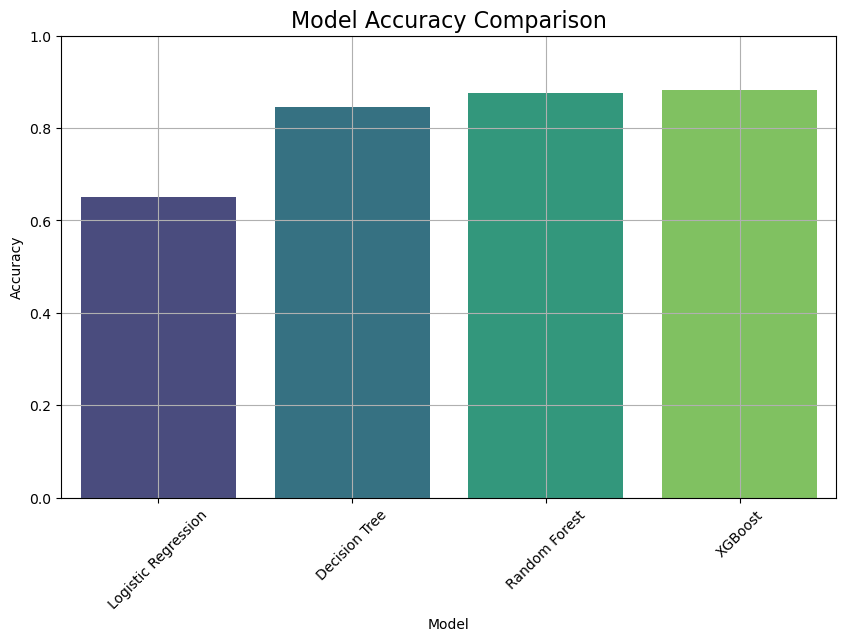

In [54]:
# Plot the summary of accuracies

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", data=summary_df, palette='viridis')
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylim(0.0, 1.0)
plt.grid(True)
plt.show()